In [5]:
import quandl

In [29]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

In [21]:
quandl.ApiConfig.api_key = ""

In [20]:
data = quandl.get("EIA/PET_RWTC_D")

In [34]:
data.head()


,Value
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87


In [33]:
data.tail()

,Value
Date,
2019-10-29,55.34
2019-10-30,54.85
2019-10-31,54.02
2019-11-01,56.04
2019-11-04,56.33


In [35]:
data.shape

(8547, 1)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8547 entries, 1986-01-02 to 2019-11-04
Data columns (total 1 columns):
Value    8547 non-null float64
dtypes: float64(1)
memory usage: 133.5 KB


In [26]:
data.describe()

,Value
count,8547.000000
mean,44.106374
std,29.236502
min,10.250000
25%,19.700000
50%,30.860000
75%,63.555000
max,145.310000


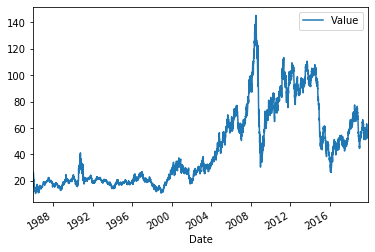

In [30]:
data.plot()
plt.show()

In [73]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as smt

In [39]:
data['newDate'] = data.index.to_julian_date()
data = sm.add_constant(data)

c:\users\satwik\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [42]:
data.head()
data.tail()

,const,Value,newDate
Date,,,
2019-10-29,1.0,55.34,2458785.5
2019-10-30,1.0,54.85,2458786.5
2019-10-31,1.0,54.02,2458787.5
2019-11-01,1.0,56.04,2458788.5
2019-11-04,1.0,56.33,2458791.5


In [41]:
data.shape

(8547, 3)

c:\users\satwik\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\satwik\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


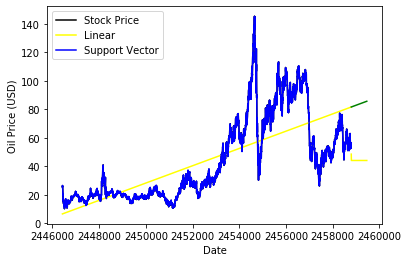

In [52]:
from  sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

date = data["newDate"].to_frame()
price = data["Value"].to_frame()

linear = LinearRegression().fit(date, price)
svr_rbf = SVR(C=1e2).fit(date, price)

future_date = []
future_price = []

last_day = 2458791.5
for i in range(1, 666):
    future_date.append([last_day + i])
    future_price.append(np.nan)

linear_pred = list(map(lambda x: float(x), linear.predict(date)))
linear_pred_future = list(map(lambda x: float(x), linear.predict(future_date)))
svr_rbf_pred = list(map(lambda x: float(x), svr_rbf.predict(date)))
svr_rbf_pred_future = list(map(lambda x: float(x), svr_rbf.predict(future_date)))



plt.plot(date, price, color='black', label='Stock Price')
plt.plot(date, linear_pred, color='yellow', label='Linear')
plt.plot(future_date, linear_pred_future, color='green')
plt.plot(date, svr_rbf_pred, color='blue', label='Support Vector')
plt.plot(future_date, svr_rbf_pred_future, color='yellow')
plt.xlabel('Date')
plt.ylabel('Oil Price (USD)')
plt.legend(loc=2)
plt.show()

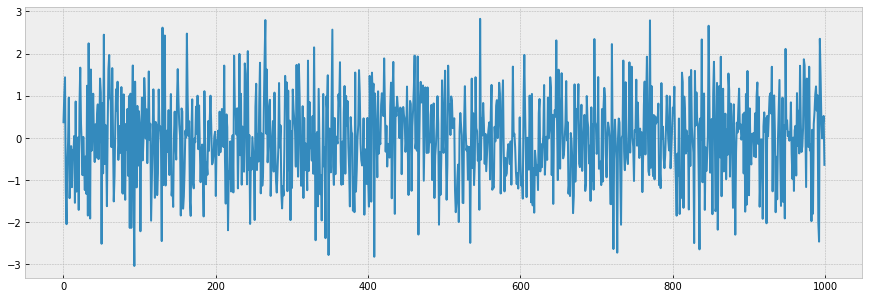

In [53]:
white_noise = np.random.normal(size=1000)
with plt.style.context('bmh'):  
    plt.figure(figsize=(15, 5))
    plt.plot(white_noise)

In [67]:

def rolling_stats(timeseries):
    
    rolling_mean = timeseries.rolling(window=365).mean()
    rolling_std = timeseries.rolling(window=365).std()

    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
   
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

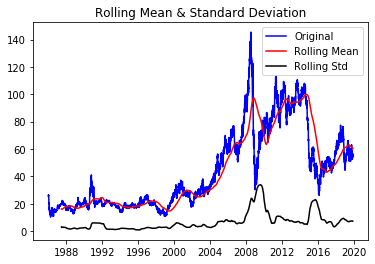

Test Statistic                   -1.715296
p-value                           0.423249
#Lags Used                        5.000000
Number of Observations Used    8541.000000
Critical Value (1%)              -3.431116
Critical Value (5%)              -2.861878
Critical Value (10%)             -2.566950
dtype: float64


In [68]:
rolling_stats(data['Value'])

In [71]:
 def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
   
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()


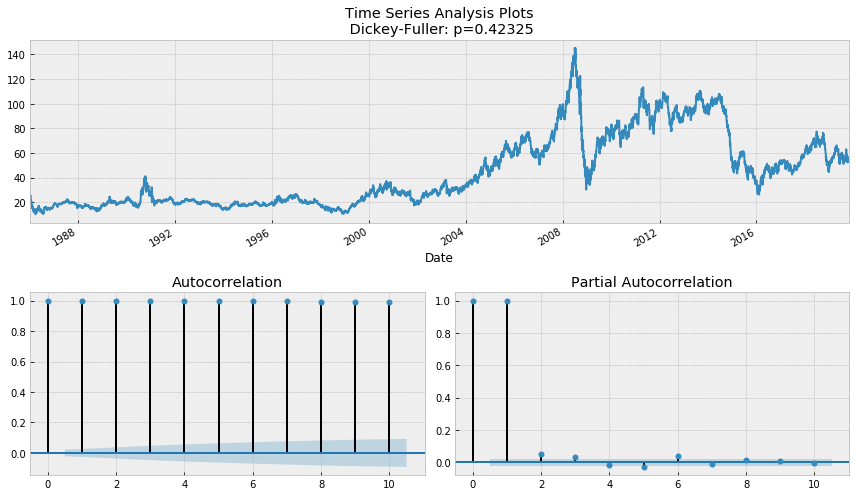

In [75]:
tsplot(data.Value, lags=10)

NameError: name 'dat_diff' is not defined

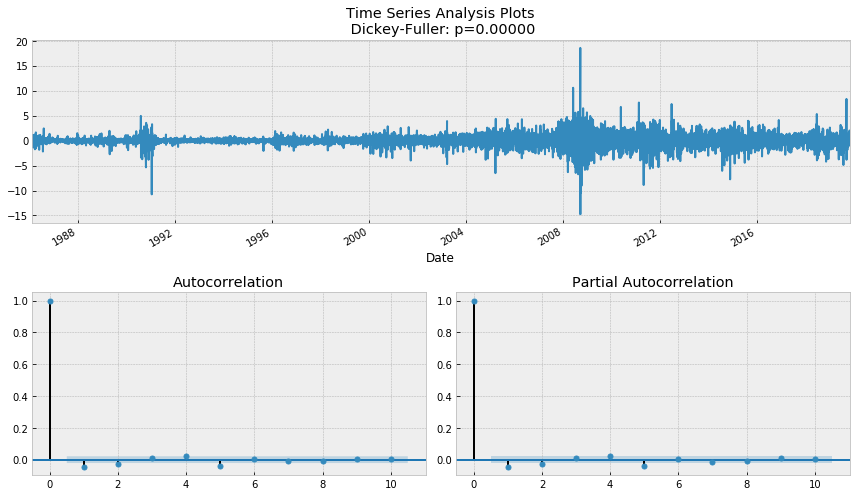

In [93]:
data_diff = data.Value - data.Value.shift(1)
tsplot(data_diff[24:], lags=10)
rolling_stats(dat_diff)

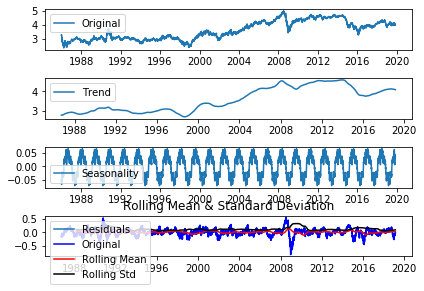

Test Statistic                -8.679522e+00
p-value                        4.323955e-14
#Lags Used                     2.700000e+01
Number of Observations Used    8.155000e+03
Critical Value (1%)           -3.431152e+00
Critical Value (5%)           -2.861894e+00
Critical Value (10%)          -2.566959e+00
dtype: float64


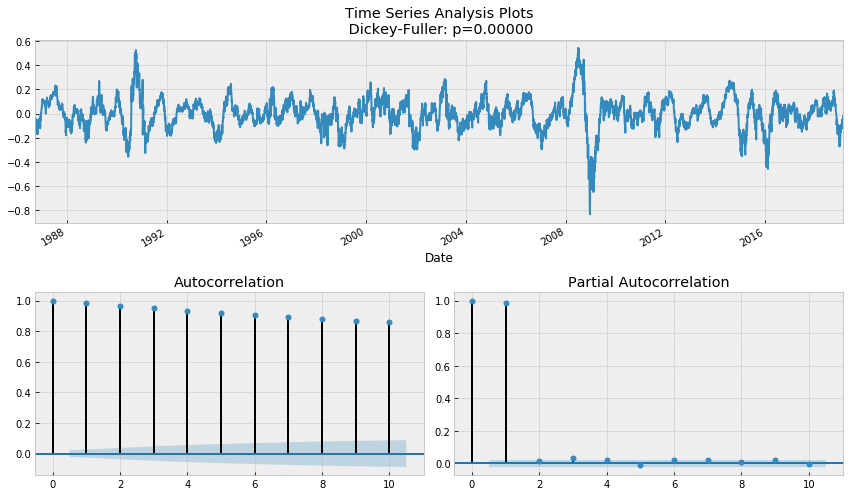

In [83]:

from statsmodels.tsa.seasonal import seasonal_decompose

ts_log = np.log(data['Value'])

decomposition = seasonal_decompose(ts_log, freq = 365)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

ts_decompose = residual
ts_decompose.dropna(inplace=True)
rolling_stats(ts_decompose)
tsplot(ts_decompose,lags=10)

c:\users\satwik\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\satwik\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\satwik\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


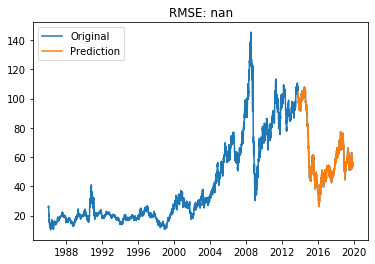

In [92]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(data.Value, order=(2, 2, 10))  
results_ARIMA = model.fit(disp=-1)
arima_pred = results_ARIMA.predict(data['Value'].index[7000], data['Value'].index[-1], typ="levels")
plt.plot(data.Value, label='Original')
plt.plot(arima_pred, label='Prediction')
plt.legend(loc=2)
plt.title('RMSE: %.4f'% np.sqrt(sum((arima_pred-data.Value[7000:])**2)/len(data.Value[7000:])))
plt.show()